In [20]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [21]:
path = "/Users/tanny/Documents/Projects/CULI Scoring/saves/"

In [22]:
metrics = []

for file in os.listdir(path):
    if file.endswith("metrics.json"):
        metrics.append(os.path.join(path, file))

In [23]:
def read_json(json_path) -> pd.DataFrame:
    import json
    with open(json_path, "r") as f:
        return pd.DataFrame(json.load(f))

def visualize_metrics(metrics: str) -> None:
    plt.style.use('dark_background')
    data = read_json(metrics)
    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.plot(data["epoch"], data["train_loss"], label="Train Loss")
    plt.plot(data["epoch"], data["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Over Epochs: {os.path.basename(metrics)}")
    plt.legend()
    plt.show()
        # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(data["epoch"], data["train_acc"], label="Train Accuracy")
    plt.plot(data["epoch"], data["val_acc"], label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Over Epochs: {os.path.basename(metrics)}")
    plt.legend()
    plt.show()

def get_max_score(metrics: str, column: str) -> float:
    max_score = 0.0
    data = read_json(metrics)
    if column in data.columns:
        max_score = max(max_score, data[column].max())
    return max_score
    return max_score

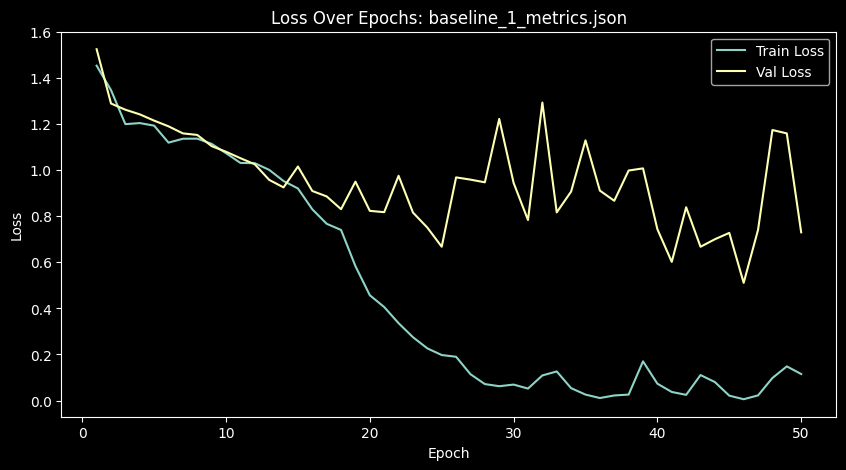

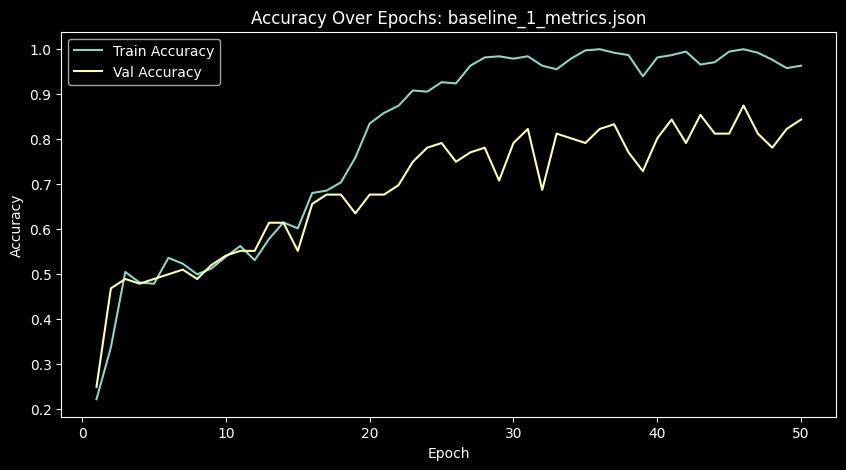

Max validation accuracy for baseline_1_metrics.json: 0.8750


In [25]:
for i in metrics:
    visualize_metrics(i)
    max_score = get_max_score(i, "val_acc")
    print(f"Max validation accuracy for {os.path.basename(i)}: {max_score:.4f}")